<a href="https://colab.research.google.com/github/panghanwu/scikit-learning_tutorial_Elwing/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

pd.options.display.max_rows = 20
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


一般資料用 pandas
巨量資料用 modin

預處理使用 pandas/DataFrame
機器學習使用 numpy/array

機器學習大概千筆資料
深度學習大概萬筆資料

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x , y = df.drop(['target'], axis=1), df['target']  # drop不會覆寫回DataFrame
x, y = np.array(x), np.array(y)

# train_test_split([1,2,3,4], [5,6,7,8], test_size=0.25, random_state=5)  # for test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.1)


將資料分training和testing是因為要用來調模型參數

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  # 創造方法 
clf.fit(x_train, y_train) # fit: 學習

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

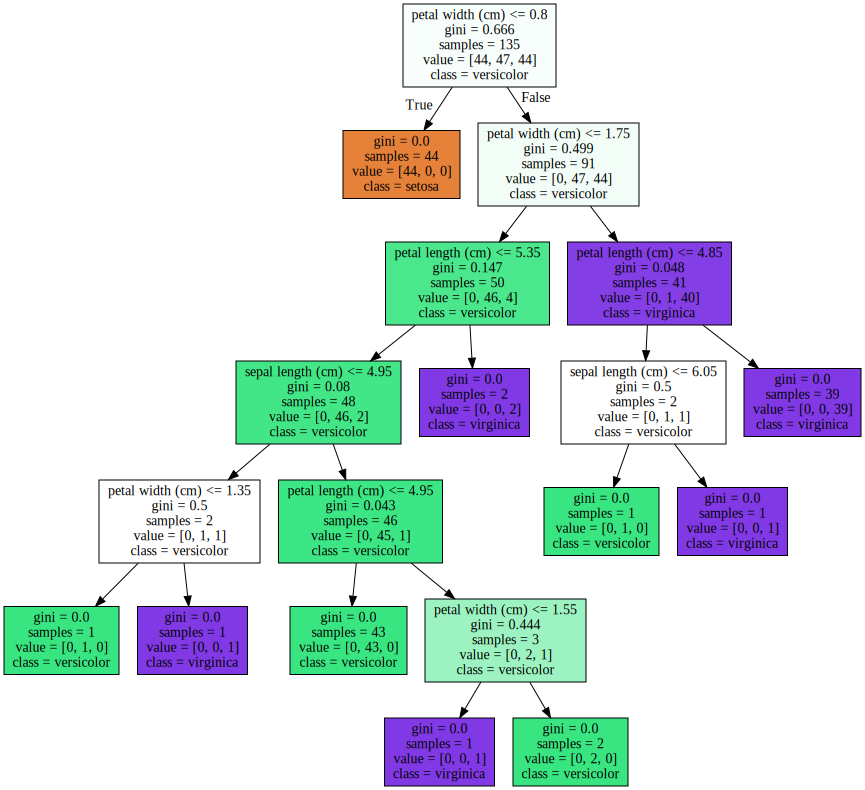

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, 
           feature_names=iris['feature_names'],
           class_names=iris['target_names'],
           filled=True)
graphviz.Source(g)

gini: 猜錯的機率

$gini = p_1(p_1-1)+p_2(p_2-1)+p_3(p_3-1)$

In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

0.9333333333333333

太深的樹容易過擬和  
決策數避免過擬和的方法  
- 前剪枝: max_depth  
- 後剪枝: 較好的方法，但sk-learn不支援。  

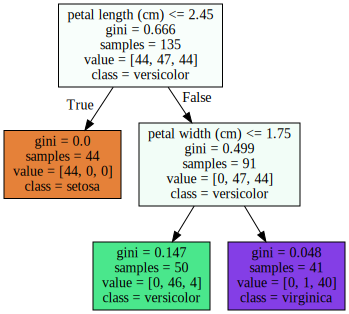

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(x_train, y_train)
g = export_graphviz(clf2, 
           feature_names=iris['feature_names'],
           class_names=iris['target_names'],
           filled=True)
graphviz.Source(g)

In [ ]:
pre = clf2.predict(x_test)
accuracy_score(pre, y_test)

0.9333333333333333